In [1]:
import os
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
vectorized_images = []
directory = os.fsencode('train/')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.tif'):
        with Image.open('train/' + filename).convert('L') as image:
            vectorized_images.append(np.asarray(image).reshape(9216))


(9216,)


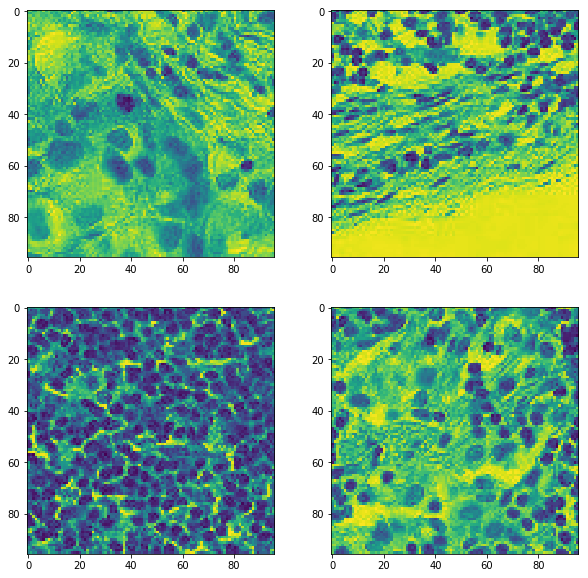

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for idx in range(4):
    fig.add_subplot(2,2,idx+1)
    imshow(vectorized_images[idx].reshape((96,96)))
print(vectorized_images[0].shape)

In [3]:
# vec_images = vectorized_images[0]
import gc
vec_images = np.zeros((10000,9216))

for idx, img in enumerate(vectorized_images[:10000]):
    vec_images[idx,:] = img

vec_images_fl32 = vec_images.astype(np.float32)
vectorized_images = []
gc.collect()

26

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_comp = 1000
pca = PCA(n_components=n_comp)
pca.fit_transform(vec_images)


array([[-1.74682889e+03, -2.72907568e+01, -2.99955776e+01, ...,
        -8.81554193e+01,  6.55912532e+01,  6.58192434e+01],
       [-2.62658213e+03, -2.31455861e+03,  1.52657989e+03, ...,
        -1.12576793e+02, -7.36648432e+01, -3.06691312e+01],
       [ 6.01220494e+03, -3.42904190e+02,  3.07863256e+01, ...,
         4.26081234e+01, -7.12429535e+01,  2.99040050e+01],
       ...,
       [ 7.49038246e+02, -1.48746974e+03, -1.51111239e+02, ...,
        -2.24618995e+01, -5.07733530e+00,  5.40012443e+01],
       [ 2.99094335e+02,  3.77822174e+02, -1.93031956e+03, ...,
         1.76676773e+00, -4.54535018e-01,  2.35181737e+02],
       [ 1.77446301e+03, -1.97468797e+02, -6.10269858e+02, ...,
        -5.28803071e+01, -2.40581111e+01, -8.40172580e+01]])

In [5]:

def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [6]:
print(sum(pca.explained_variance_ratio_) * 100, '% of variance explained')

83.1076284081021 % of variance explained


(1000, 9216)


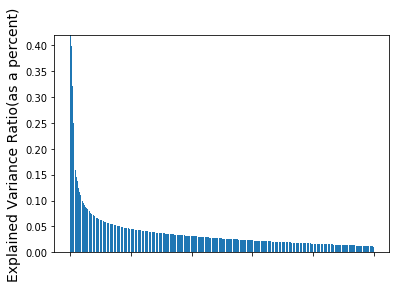

In [29]:
fig,ax = plt.subplots(1)
ax.set_xticklabels([])
plt.ylabel('Explained Variance Ratio(as a percent)', fontsize=14)
plt.ylim([0,max(pca.explained_variance_ratio_)])
plt.bar(np.arange(n_comp), pca.explained_variance_ratio_*100)

print(pca.components_.shape)

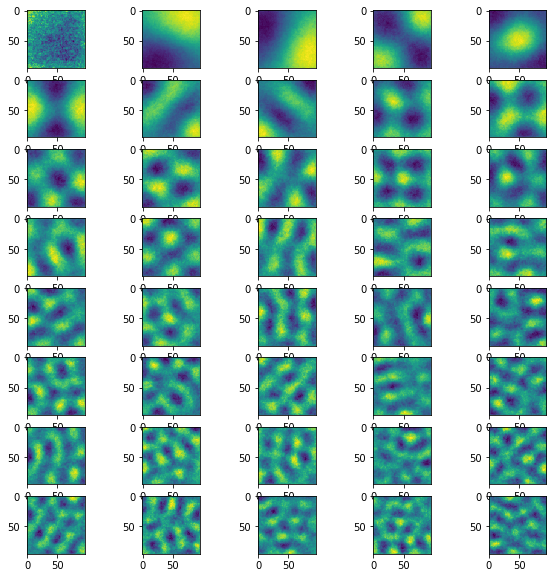

In [30]:
eigencells = pca.components_.reshape((n_comp, 96, 96))
fig = plt.figure(figsize=(10,10))
for idx in range(40):
    fig.add_subplot(8, 5,idx+1)
    imshow(eigencells[idx])

Text(0.5, 1.0, 'Reconstructed from Full PCA')

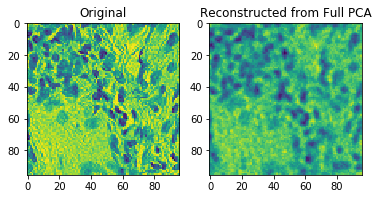

In [31]:
#helper function to reconstruct image sourced from class jupyter notebook
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
idx_to_reconstruct = 4
X_idx = vec_images[idx_to_reconstruct]
low_dim_rep, reconstructed_img = reconstruct_image(pca,X_idx.reshape(1,-1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((96,96)))
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(reconstructed_img.reshape((96,96)))
plt.title('Reconstructed from Full PCA')
